# BootCamp 2019 - Week 5

## Iterative Solvers

Author: Martina Fraschini

In [1]:
# import packages
import numpy as np
from scipy import linalg as la
from scipy import sparse
from matplotlib import pyplot as plt

### Problem 1

In [2]:
# define function for Jacobi method
def myJacobi(A, b, tol, maxiters):
    x_old = np.empty_like(b)
    for i in range(maxiters):
        d = A.diagonal()
        x_new = x_old + (b - A @ x_old) / d
        err = la.norm(x_new - x_old, np.inf)
        if err < tol:
            print("Algorithm converged in {} iterations.".format(i))
            return x_new
        else:
            x_old = np.copy(x_new)
    print("Algorithm didn't converge.")
    return x_new
            
# define function to generate matrix for convergence with Jacobi method
def diag_dom(n, num_entries=None):
    """Generate a strictly diagonally dominant (n, n) matrix.
    Parameters:
        n (int): The dimension of the system.
        num_entries (int): The number of nonzero values.
            Defaults to n^(3/2)-n.
    Returns:
        A ((n,n) ndarray): A (n, n) strictly diagonally dominant matrix.
    """
    if num_entries is None:
        num_entries = int(n**1.5) - n
    A = np.zeros((n,n))
    rows = np.random.choice(np.arange(0,n), size=num_entries)
    cols = np.random.choice(np.arange(0,n), size=num_entries)
    data = np.random.randint(-4, 4, size=num_entries)
    for i in range(num_entries):
        A[rows[i], cols[i]] = data[i]
    for i in range(n):
        A[i,i] = np.sum(np.abs(A[i])) + 1
    return A

n = 100
b0 = np.random.random(n)
A0 = diag_dom(n)

xsol = myJacobi(A0, b0, 1e-08, 10000)
print("Check closeness of solution: ", np.allclose(A0@xsol, b0))

Algorithm converged in 20 iterations.
Check closeness of solution:  True


### Problem 2

Algorithm converged in 33 iterations.


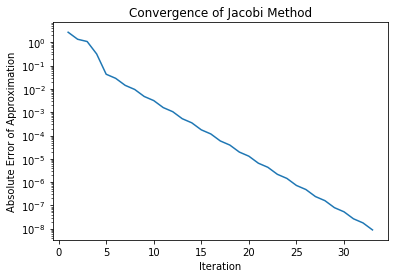

In [3]:
# define function for Jacobi method
def myJacobi(A, b, tol, maxiters, plot=False):
    x_old = np.empty_like(b)
    err = np.ones(maxiters)
    for i in range(maxiters):
        d = A.diagonal()
        x_new = x_old + (b - A @ x_old) / d
        err[i] = la.norm(x_new - x_old, np.inf)
        if err[i] < tol:
            print("Algorithm converged in {} iterations.".format(i+1))
            
            if plot:
                err = err[:i+1]
                plt.semilogy(np.arange(1,i+2),err)
                plt.xlabel("Iteration")
                plt.ylabel("Absolute Error of Approximation")
                plt.title("Convergence of Jacobi Method")
                plt.show()
            
            return x_new
        else:
            x_old = np.copy(x_new)
    print("Algorithm didn't converge.")
    return x_new

n = 10
b0 = np.random.random(n)
A0 = diag_dom(n)

xsol = myJacobi(A0, b0, 1e-08, 10000, True)

### Problem 3

Algorithm converged in 12 iterations.


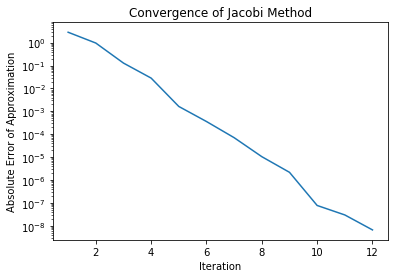

In [4]:
# define function for Gauss-Seidel method
def myGaussSeidel(A, b, tol, maxiters, plot=False):
    x_old = np.empty_like(b)
    err = np.ones(maxiters)
    for i in range(maxiters):
        x_new = np.copy(x_old)
        for r in range(np.shape(A)[0]):
            x_new[r] = x_old[r] + (b[r] - A[r,:] @ x_new) / A[r,r]
        err[i] = la.norm(x_new - x_old, np.inf)
        if err[i] < tol:
            print("Algorithm converged in {} iterations.".format(i+1))
            
            if plot:
                err = err[:i+1]
                plt.semilogy(np.arange(1,i+2),err)
                plt.xlabel("Iteration")
                plt.ylabel("Absolute Error of Approximation")
                plt.title("Convergence of Jacobi Method")
                plt.show()
            
            return x_new
        else:
            x_old = np.copy(x_new)
    print("Algorithm didn't converge.")
    return x_new

n = 10
b0 = np.random.random(n)
A0 = diag_dom(n)

xsol = myGaussSeidel(A0, b0, 1e-08, 10000, True)

### Problem 4

In [5]:
# define function for Gauss-Seidel method for sparse matrices
def mysparseGaussSeidel(A, b, tol, maxiters):
    x_old = np.zeros_like(b)
    for i in range(maxiters):
        x_new = np.copy(x_old)
        for r in range(np.shape(A)[0]):
            rowstart = A.indptr[r]
            rowend = A.indptr[r+1]
            Arx = A.data[rowstart:rowend] @ x_new[A.indices[rowstart:rowend]]
            x_new[r] = x_old[r] + (b[r] - Arx) / A[r,r]
        err = la.norm(x_new - x_old, np.inf)
        if err < tol:
            print("Algorithm converged in {} iterations.".format(i+1))
            return x_new
        else:
            x_old = np.copy(x_new)
    print("Algorithm didn't converge.")
    return x_new

n = 10000
b0 = np.random.random(n)
A0 = sparse.csr_matrix(diag_dom(n))

xsol = mysparseGaussSeidel(A0, b0, 1e-08, 10000)

Algorithm converged in 8 iterations.


### Problem 5

In [6]:
# define function for SOR method for sparse matrices
def mysparseSOR(A, b, tol, maxiters, w):
    x_old = np.zeros_like(b)
    A = A.tocsr()
    for i in range(maxiters):
        x_new = np.copy(x_old)
        for r in range(np.shape(A)[0]):
            rowstart = A.indptr[r]
            rowend = A.indptr[r+1]
            Arx = A.data[rowstart:rowend] @ x_new[A.indices[rowstart:rowend]]
            x_new[r] = x_old[r] + w * (b[r] - 1*Arx) / A[r,r]
        err = la.norm(x_new - x_old, np.inf)
        if err < tol:
            print("Algorithm converged in {} iterations.".format(i+1))
            return x_new, i
        else:
            x_old = np.copy(x_new)
    print("Algorithm didn't converge.")
    return x_new, i

n = 10000
b0 = np.random.random(n)
A0 = sparse.csr_matrix(diag_dom(n))
omega = 1.4

xsol, nit = mysparseSOR(A0, b0, 1e-08, 10000, omega)

Algorithm converged in 22 iterations.


### Problem 6

Algorithm converged in 73 iterations.


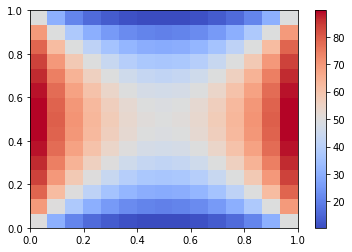

In [7]:
# define function to construct heat sparse matrix
def heatmat(n):
    # Construct matrix A
    diagonals = [[1]*(n-1), [-4]*n, [1]*(n-1)]
    B = sparse.diags(diagonals, [-1, 0, 1]).toarray()
    A = sparse.block_diag([B]*n)
    diagonals = [[1]*(n*(n-1)), [1]*(n*(n-1))]
    C = sparse.coo_matrix(sparse.diags(diagonals, [-n, n]).toarray())
    A += C
        
    # construct matrix b
    smallb = np.zeros(n)
    smallb[0] = -100
    smallb[-1] = -100
    b = np.tile(smallb, n)
    
    return A, b

# define function for heat flow
def heatflow(n, w, tol, maxiters=100, plot=False):
    A, b = heatmat(n)
    u, i = mysparseSOR(A, b, tol, maxiters, w)
    
    if plot:
        uu = u.reshape((n,n))
        x_grid = np.linspace(0,1,n+1)
        X, Y = np.meshgrid(x_grid, x_grid)
        fig, ax = plt.subplots(1)
        cax = ax.pcolormesh(X, Y, uu, cmap='coolwarm')
        fig.colorbar(cax)
        plt.show()
        
    return u, i

n = 15
omega = 1.7

xsol, nit = heatflow(n, omega, 1e-08, 10000, True)

### Problem 7

Algorithm converged in 233 iterations.
Algorithm converged in 215 iterations.
Algorithm converged in 198 iterations.
Algorithm converged in 182 iterations.
Algorithm converged in 168 iterations.
Algorithm converged in 154 iterations.
Algorithm converged in 140 iterations.
Algorithm converged in 128 iterations.
Algorithm converged in 116 iterations.
Algorithm converged in 104 iterations.
Algorithm converged in 93 iterations.
Algorithm converged in 83 iterations.
Algorithm converged in 72 iterations.
Algorithm converged in 62 iterations.
Algorithm converged in 51 iterations.
Algorithm converged in 44 iterations.
Algorithm converged in 48 iterations.
Algorithm converged in 61 iterations.
Algorithm converged in 91 iterations.
Algorithm converged in 180 iterations.


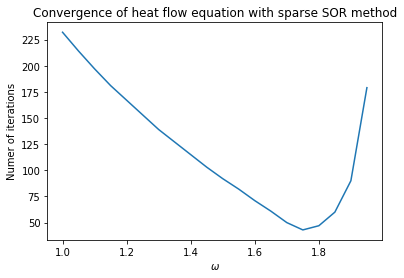

In [8]:
omegavec = np.linspace(1., 1.95, 20)
n = 20
nit = np.empty_like(omegavec)

for ind, omega in enumerate(omegavec):
    xsol, nit[ind] = heatflow(n, omega, 1e-2, 1000, False)
    
plt.plot(omegavec, nit)
plt.xlabel(r"$\omega$")
plt.ylabel("Numer of iterations")
plt.title("Convergence of heat flow equation with sparse SOR method")
plt.show()